In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('olympics_dataset.csv')
noc_country = pd.read_csv('noc_country.csv')

In [3]:
noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [4]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [5]:
df.shape

(252565, 11)

In [35]:
df.isnull().sum()

In [37]:
df.tail()

In [8]:
df[df.Season == 'Summer'].shape

(252565, 11)

In [9]:
# df.groupby('NOC')

In [10]:
df['Team'].unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Lao PDR', 'DR Congo',
       'DPR Korea'], dtype=object)

In [11]:
df['NOC'].unique().shape

(234,)

In [12]:
df['City'].unique().shape

(23,)

In [13]:
df['Sport'].unique().shape

(76,)

In [14]:
df['Event'].unique().shape

(1041,)

In [15]:
df.duplicated().sum()

0

In [16]:
df.Medal.value_counts()

Medal
No medal    213747
Bronze       13070
Gold         13002
Silver       12746
Name: count, dtype: int64

In [17]:
df = df.merge(noc_country, on='NOC', how='left')

In [33]:
df.duplicated().sum()

In [31]:
df.isnull().sum()

In [20]:
df.drop_duplicates(inplace=True)

In [29]:
pd.get_dummies(df['Medal'])

In [22]:
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [27]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()

In [25]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

In [25]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'])

In [26]:
medal_tally = medal_tally.groupby('Country').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()

In [27]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [23]:
medal_tally.head()

In [29]:
years = df['Year'].unique().tolist()

In [30]:
years.sort()
years.insert(0, 'Overall')

In [32]:
countries = df['Country'].dropna().unique().tolist()

In [33]:
countries.sort()

In [34]:
countries.insert(0, "Overall")

In [36]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'])
    flag = 0
    if(year == "Overall" and country == "Overall"):
        temp_df = medal_df

    if(year == "Overall" and country != "Overall"):
        temp_df = medal_df[medal_df['Country'] == country]
        flag = 1

    if(year != "Overall" and country == "Overall"):
        temp_df = medal_df[medal_df['Year'] == year]

    if(year != "Overall" and country != "Overall"):
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['Country'] == country)]
        
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('Country').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']    

    print(x)

In [1]:
fetch_medal_tally(df, 'Overall','India')

In [ ]:
medal_df = medal_tally.groupby('Country').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()

## Overall Analysis
* no. of editions
* no. of cities
* no. of events/sports
* no. of Athletes
* participating nations

In [ ]:
df['Year'].unique().shape[0]-1

In [ ]:
df['City'].unique().shape[0]
df['City'].unique()

In [ ]:
df['Event'].unique().shape[0]
df['Event'].unique()

In [ ]:
df['Sport'].unique().shape[0]
df['Sport'].unique()

In [ ]:
df['Name'].unique().shape[0]

In [ ]:
df['Country'].unique().shape[0]

In [93]:
# plotting graph over the time

nations_over_time = df.drop_duplicates(['Year', 'Country'])['Year'].value_counts().reset_index()

In [109]:
nations_over_time = nations_over_time.sort_values('Year')

In [115]:
nations_over_time.rename(columns = {'count':'No. of Countries','Year':'Edition'}, inplace = True)

In [21]:
nations_over_time

In [119]:
import plotly.express as px

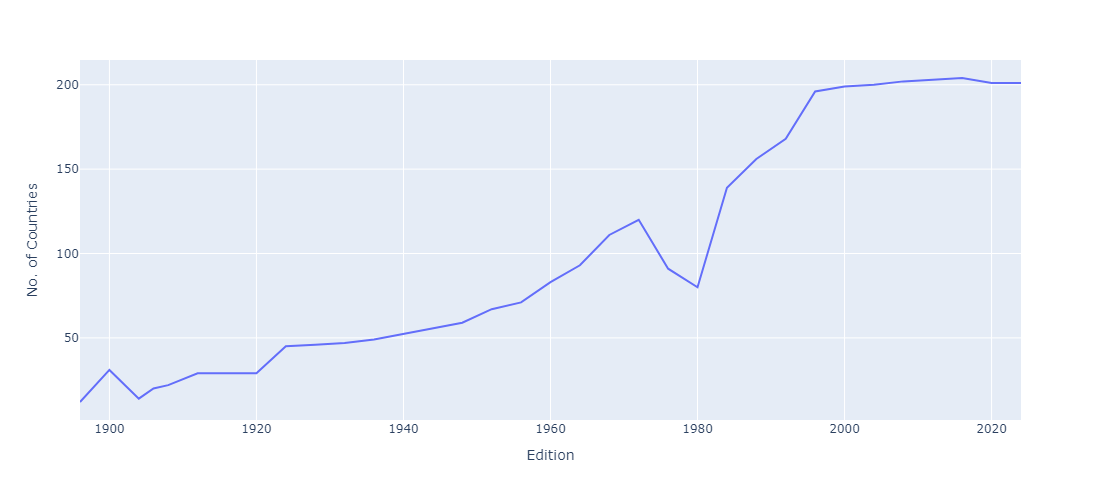

In [135]:
fig = px.line(nations_over_time, x='Edition', y='No. of Countries', width=800, height=500)
fig.show()

In [141]:
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [19]:
events_over_time

In [147]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

In [157]:
y = x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year', ylabel='Sport'>

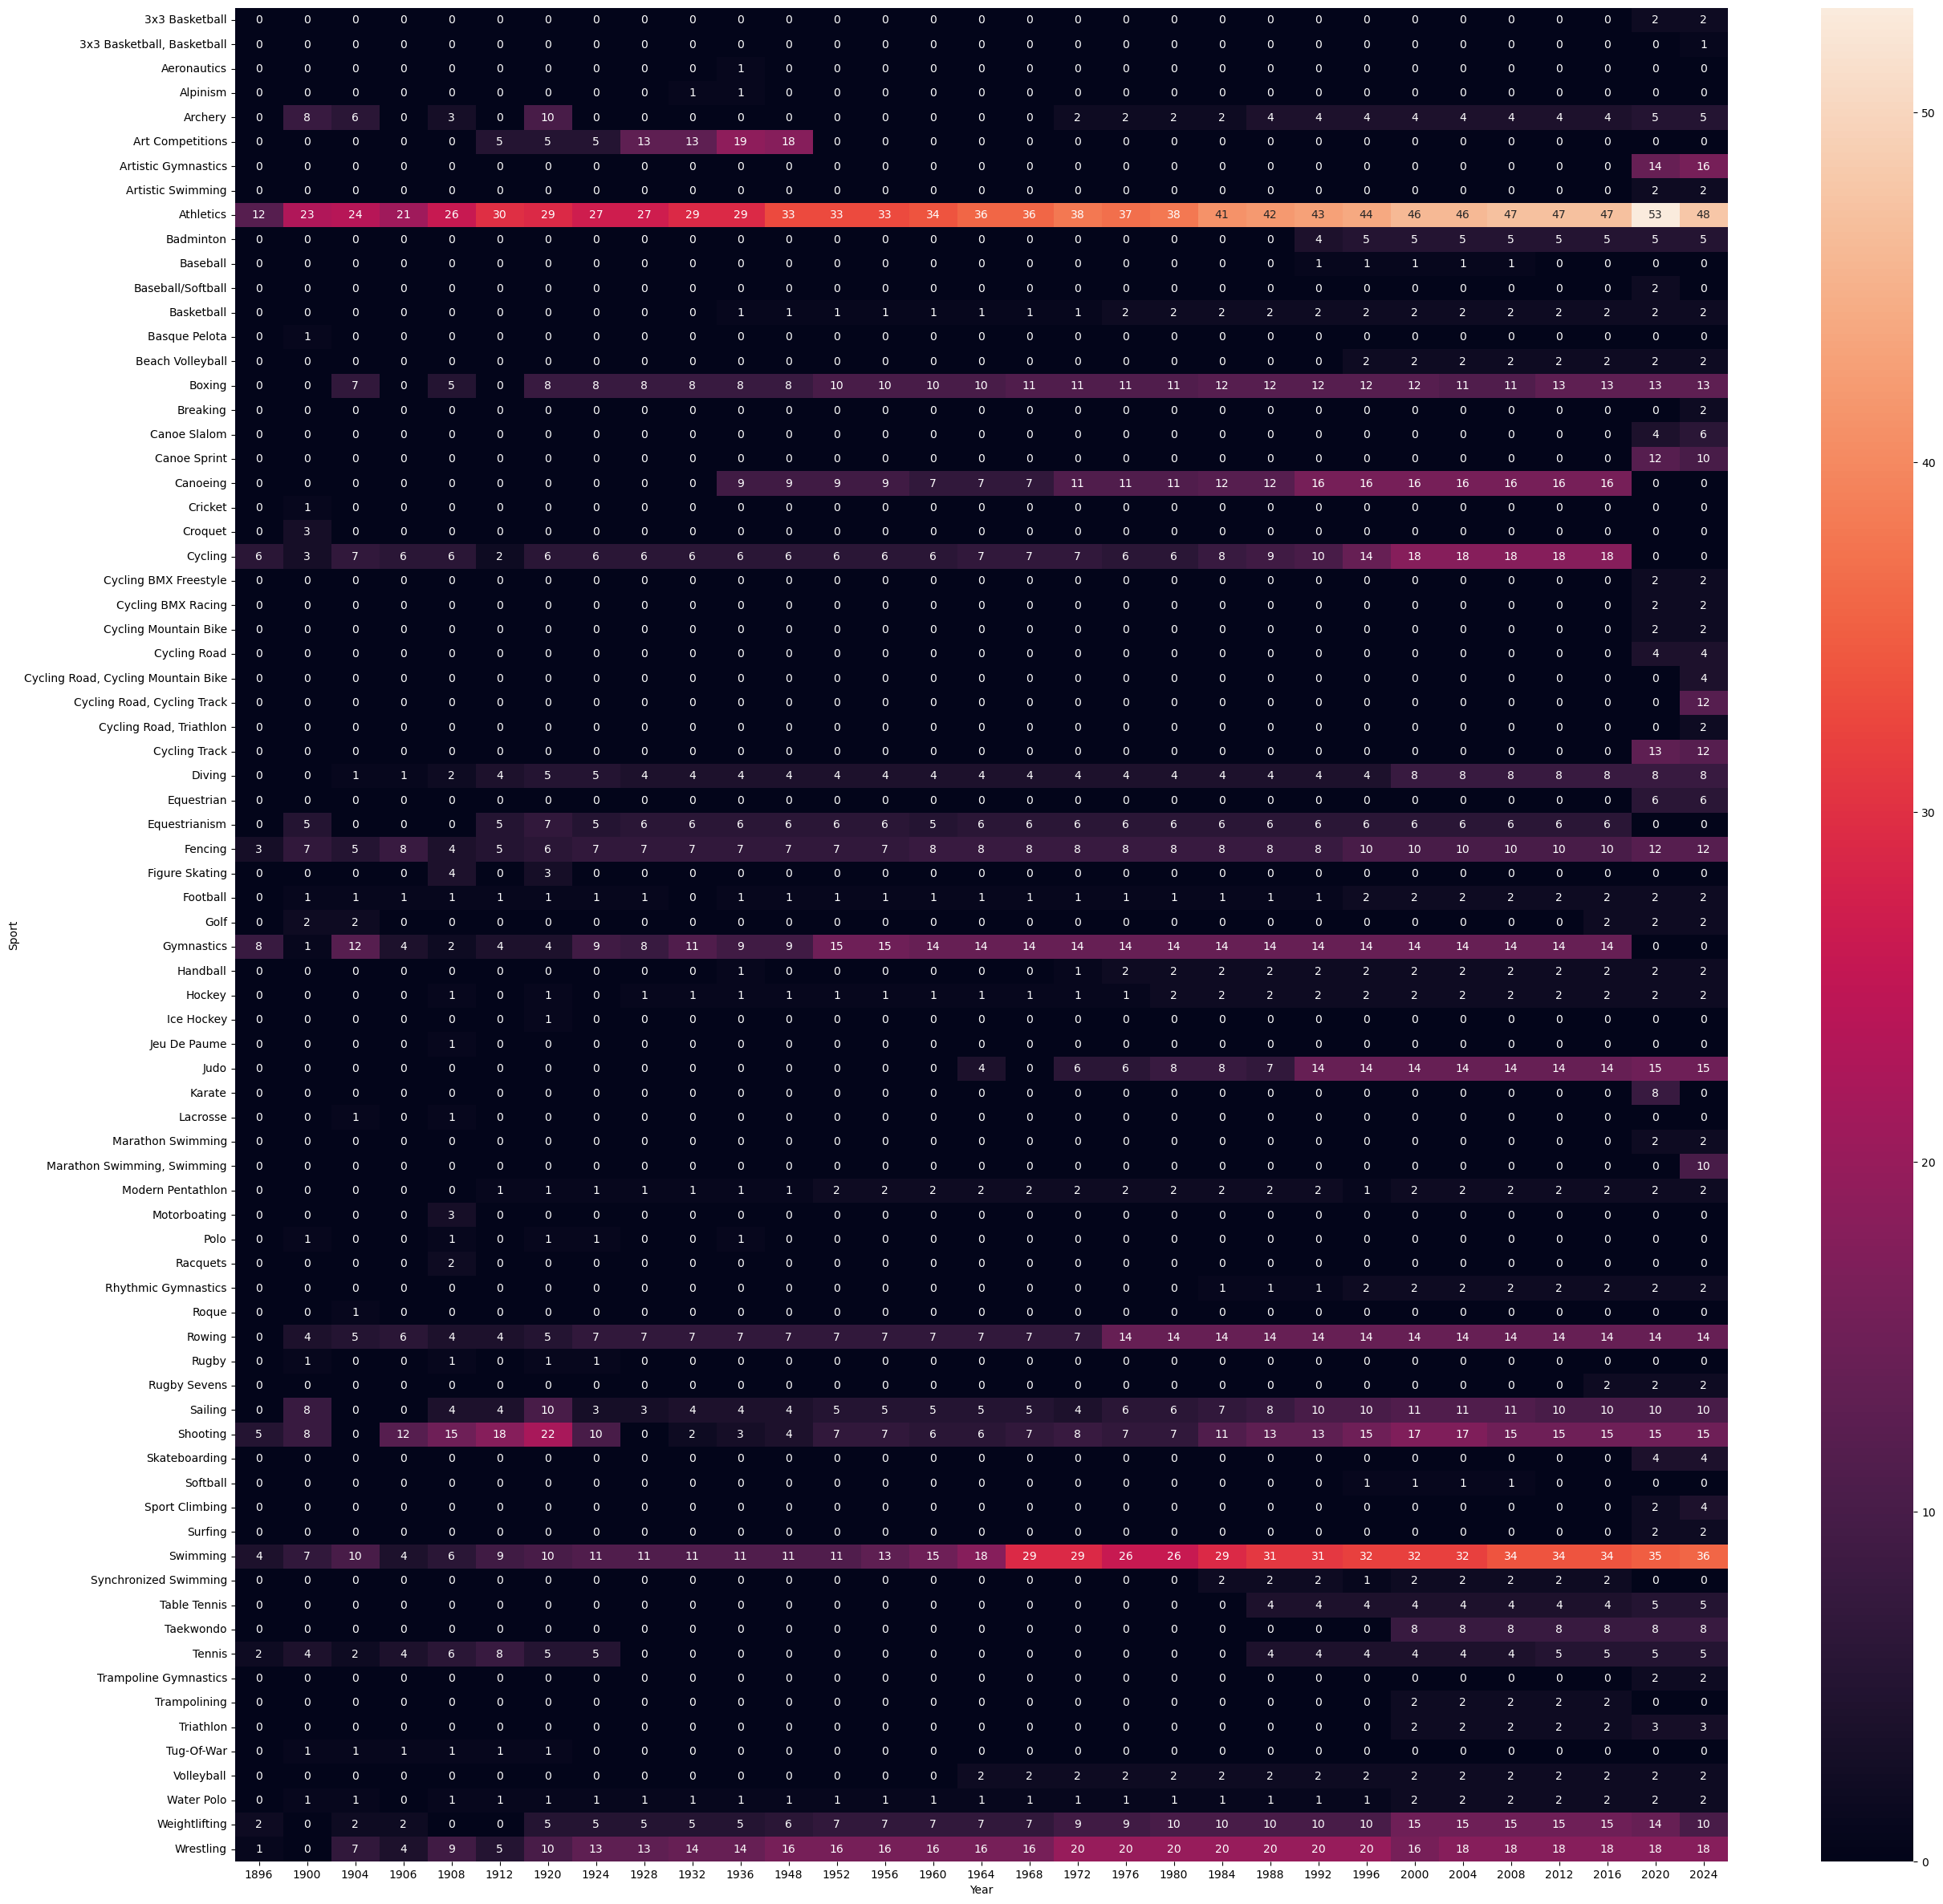

In [167]:
plt.figure(figsize=(30, 30))
sns.heatmap(y, annot=True)

In [292]:
x = df[df['Medal'] != 'No medal']


In [300]:
def most_successful(df, sport):
    temp_df = df[df['Medal'] != 'No medal']
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, on='Name')[['Name', 'count', 'Sport', 'Country']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'}, inplace=True)
    return x

In [17]:
most_successful(x, 'Gymnastics')

## Countrywise Analysis
* Countrywise medal tally per year(line plot)
* What Countries are good at heatmap
* Most Successful Athletes(Top 10)

In [310]:
temp_df = df[df['Medal'] != 'No medal']

In [3]:
temp_df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'], inplace=True)

In [356]:
new_df = temp_df[temp_df['Country'] == 'India']

In [360]:
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [5]:
final_df

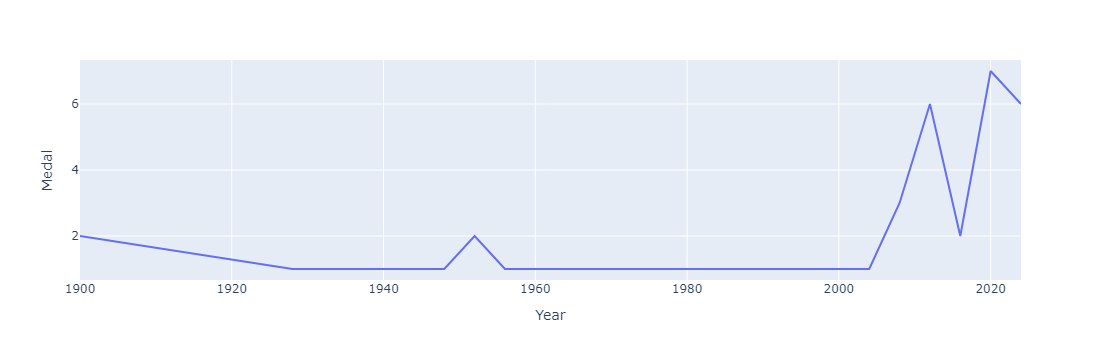

In [364]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

In [389]:
y = df[df['Country'] == 'India'].pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype('int')

In [7]:
# y

<Axes: xlabel='Year', ylabel='Sport'>

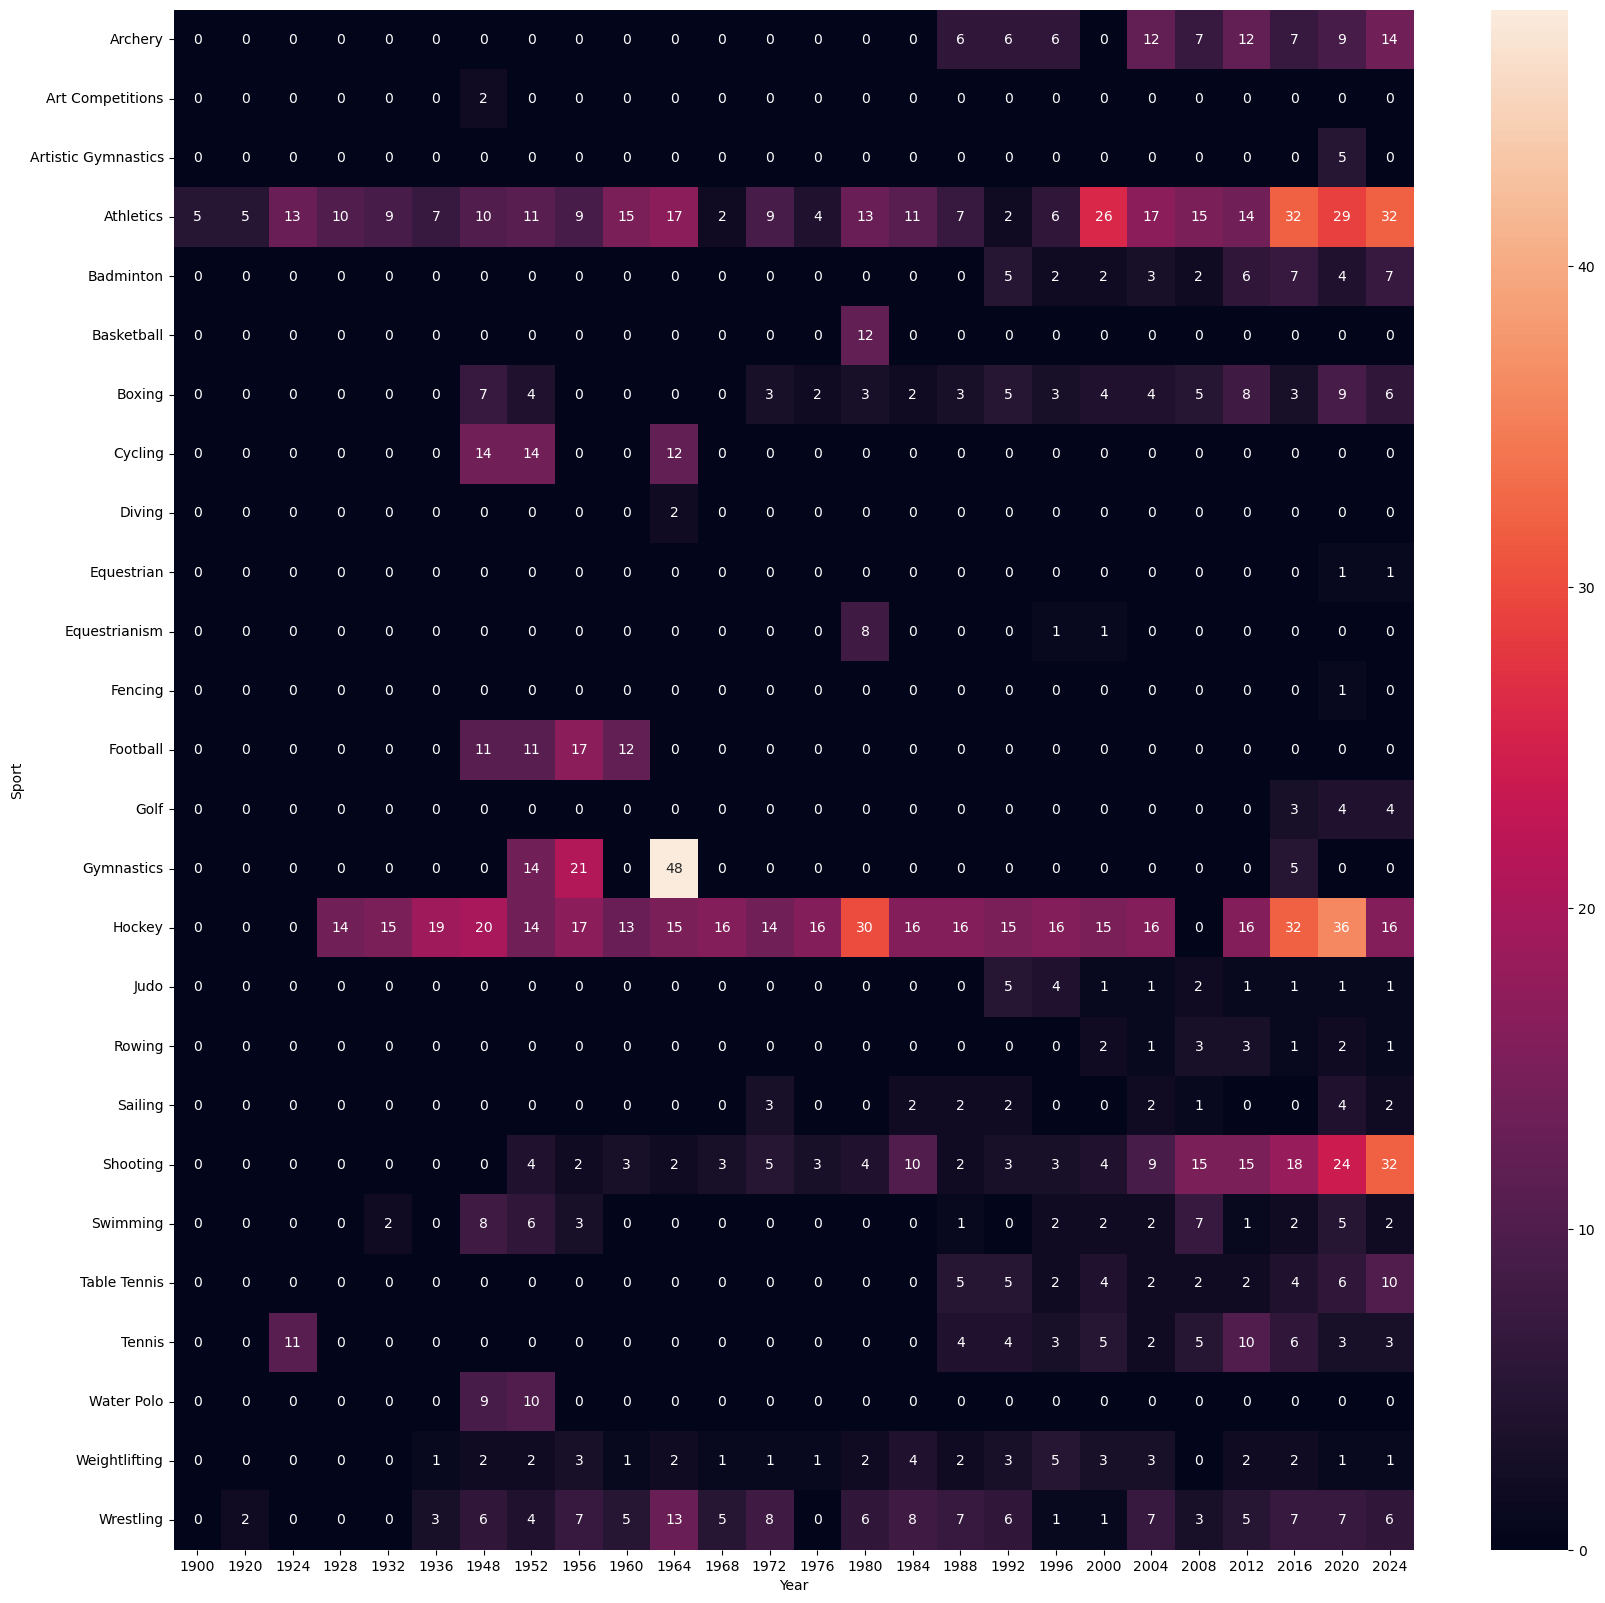

In [395]:
plt.figure(figsize=(20,20))
sns.heatmap(y, annot=True)

In [401]:
athlete_df = df.drop_duplicates(subset=['Name', 'Country'])

In [9]:
df

## Athlete wise

In [426]:
men = df[df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()

In [11]:
men.rename(columns={'Name':'Male'})

In [435]:
women = df[df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [13]:
women.rename(columns={'Name':'Female'})

In [449]:
final_df = men.merge(women, on='Year', how='left')

In [456]:
final_df.rename(columns={'Name_x':'Male', 'Name_y':'Female'},inplace=True)

In [478]:
final = final_df.fillna(0).astype('int')

In [15]:
# final

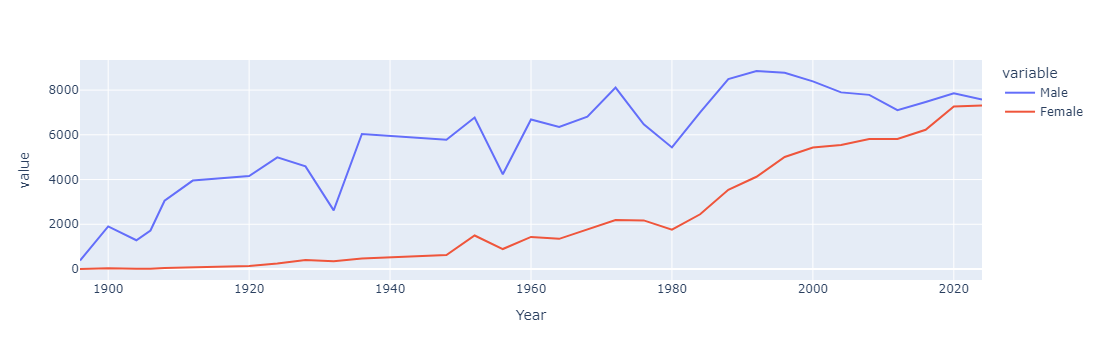

In [484]:
fig = px.line(final, x='Year', y=['Male','Female'])
fig.show()